<a href="https://colab.research.google.com/github/J-Milando-10/STA-365-Homework/blob/main/STA365_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1

In [2]:
import random
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pymc as pm


from google.colab import files
uploaded = files.upload() #this will prompt you to choose a file
import io
df = pd.read_csv(io.BytesIO(uploaded['aerofit_treadmill_data.csv']))


Saving aerofit_treadmill_data.csv to aerofit_treadmill_data.csv


In [3]:
df2 = df.replace(["KP281", "KP481", "KP781", "Male", "Female", "Single", "Partnered"],[0,1,2,0,1,0,1])
cov_mat = df2.cov().to_numpy()
cov_mat

array([[ 6.20732464e-01,  1.76288020e-01, -9.00062073e-02,
         6.30664184e-01, -6.82805711e-03,  4.59342024e-01,
         4.49410304e-01,  8.11734140e+03,  2.33563004e+01],
       [ 1.76288020e-01,  4.82121664e+01, -9.47237741e-02,
         3.14941030e+00,  6.56921167e-01,  1.13469894e-01,
         4.06828057e-01,  5.88444634e+04,  1.31865301e+01],
       [-9.00062073e-02, -9.47237741e-02,  2.45313470e-01,
        -7.53569212e-02,  4.59342024e-03, -1.15207945e-01,
        -1.20918684e-01, -1.65190453e+03, -5.59652390e+00],
       [ 6.30664184e-01,  3.14941030e+00, -7.53569212e-02,
         2.61486654e+00,  5.45934202e-02,  6.93171943e-01,
         6.36623215e-01,  1.67047178e+04,  2.57707945e+01],
       [-6.82805711e-03,  6.56921167e-01,  4.59342024e-03,
         5.45934202e-02,  2.42427064e-01, -4.15890751e-03,
        -2.39602731e-02,  1.22148703e+03,  6.54717567e-01],
       [ 4.59342024e-01,  1.13469894e-01, -1.15207945e-01,
         6.93171943e-01, -4.15890751e-03,  1.176784

In [30]:
D = np.diag(cov_mat) #useful for part 3

In [4]:
X = df.drop(columns = ['Miles']);
y = df.Miles;

n, p = len(X), len(X.columns);

#need to replace categorical data with numbers so we can use in out later processes
X_final = X.replace(["KP281", "KP481", "KP781", "Male", "Female", "Single", "Partnered"],[0,1,2,0,1,0,1])

X_final

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income
0,0,18,0,14,0,3,4,29562
1,0,19,0,15,0,2,3,31836
2,0,19,1,14,1,4,3,30699
3,0,19,0,12,0,3,3,32973
4,0,20,0,13,1,4,2,35247
...,...,...,...,...,...,...,...,...
175,2,40,0,21,0,6,5,83416
176,2,42,0,18,0,5,4,89641
177,2,45,0,16,0,5,5,90886
178,2,47,0,18,1,4,5,104581


In [5]:
y_final = y.to_numpy().reshape(180,1)
#needed to do this so MLR would run

In [6]:
len(X.columns)

8

In [7]:
X_final.to_numpy()

array([[     0,     18,      0, ...,      3,      4,  29562],
       [     0,     19,      0, ...,      2,      3,  31836],
       [     0,     19,      1, ...,      4,      3,  30699],
       ...,
       [     2,     45,      0, ...,      5,      5,  90886],
       [     2,     47,      0, ...,      4,      5, 104581],
       [     2,     48,      0, ...,      4,      5,  95508]])

In [10]:
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0) # half normal
    y = pm.Normal('y', mu=pm.math.dot(X_final.to_numpy(), betas), sigma=sigma, observed=y_final)

with MLR:
    idata = pm.sample()


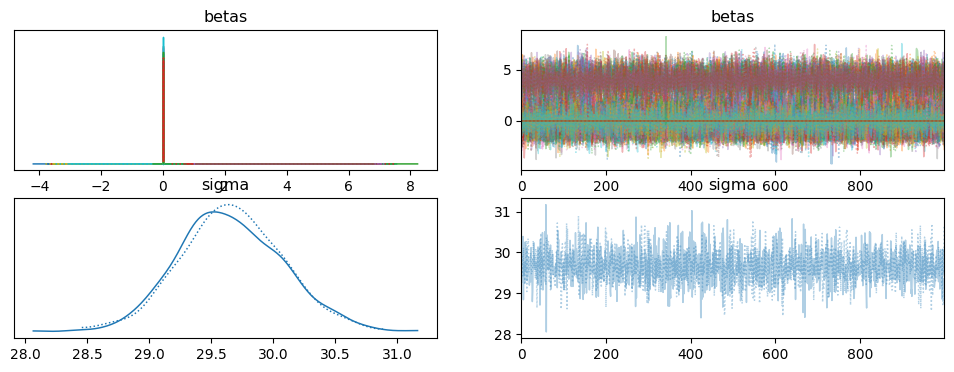

In [11]:
import arviz as az
az.plot_trace(idata, var_names=['betas', 'sigma']);

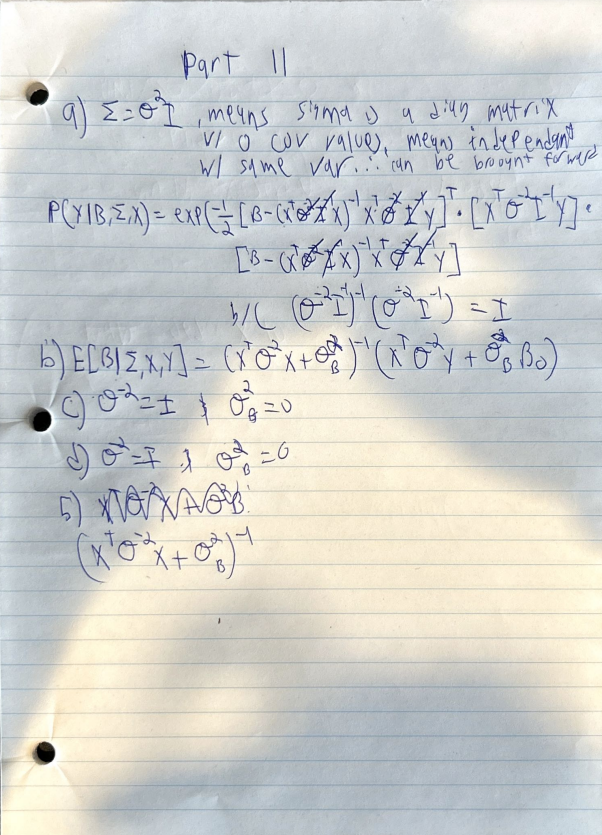

Part 3

In [29]:

with pm.Model() as MNV_LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0,
                                 sd_dist=pm.Gamma.dist(alpha = 2, beta = 2), compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L);
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    mu = pm.MvNormal('mu', mu=np.array(0), cov=np.eye(p));
    y = pm.MvNormal('y', mu=mu, cov = D.dot(Sigma).dot(D), observed=y_final)
    idata = pm.sample()

    #CODE RUNS JUST TAKES TOO LONG TO RUN WHOLE THING

ValueError: Not enough samples to build a trace.